<a href="https://colab.research.google.com/github/JulianotCosta/Dictionary_IA/blob/master/C%C3%B3pia_de_cota%C3%A7%C3%A3o_de_a%C3%A7%C3%B5es_e_FII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed


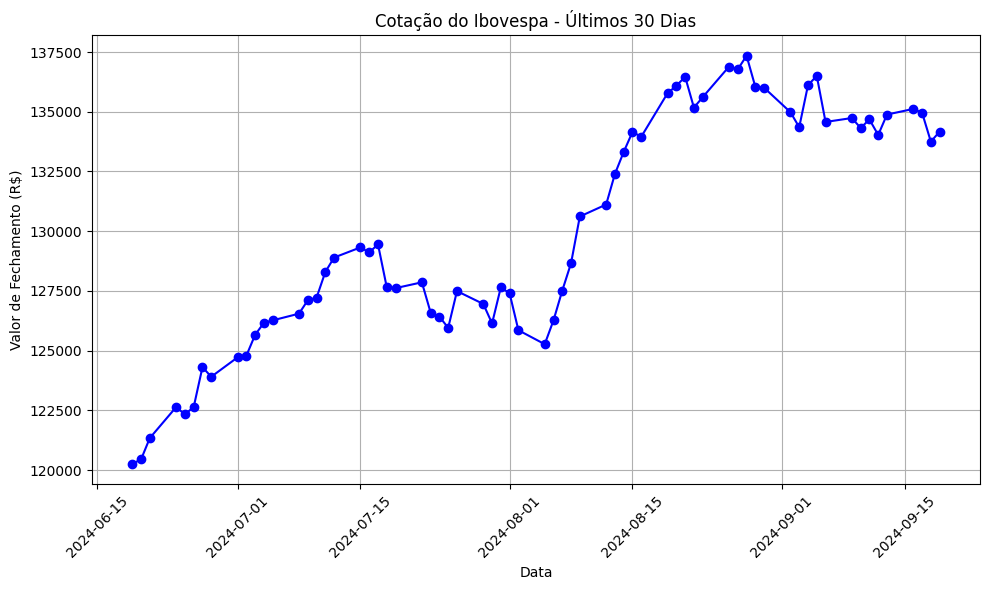

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados do Ibovespa dos últimos 30 dias
ibovespa = yf.download('^BVSP', period='3mo', interval='1d')

# Verificar se os dados foram baixados corretamente
if not ibovespa.empty:
    # Plotar o gráfico de fechamento dos últimos 5 dias
    plt.figure(figsize=(10, 6))
    plt.plot(ibovespa.index, ibovespa['Close'], marker='o', linestyle='-', color='blue')
    plt.title('Cotação do Ibovespa - Últimos 30 Dias')
    plt.xlabel('Data')
    plt.ylabel('Valor de Fechamento (R$)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()
else:
    print("Não foi possível obter os dados do Ibovespa.")


[*********************100%***********************]  1 of 1 completed


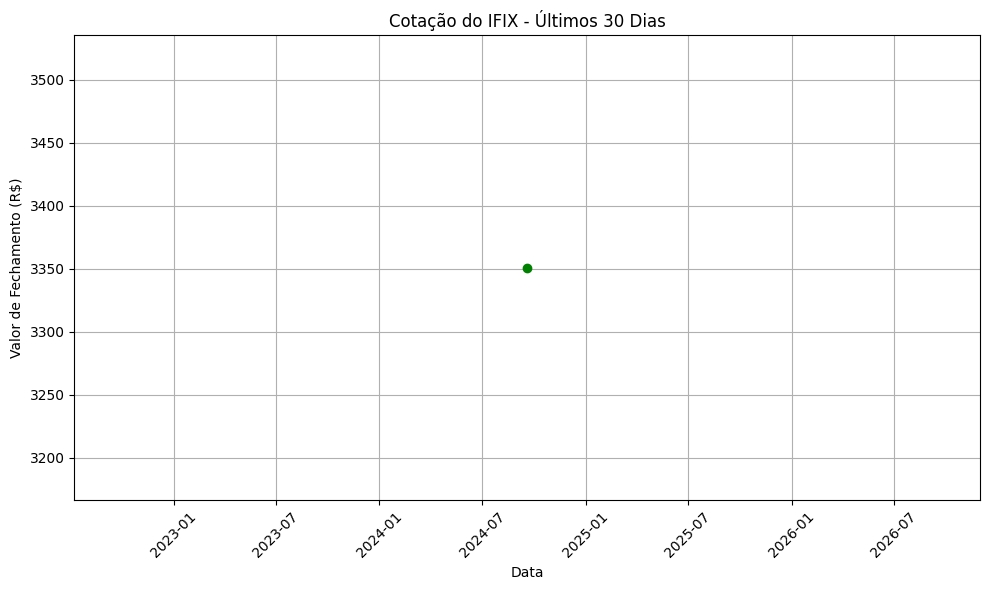

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar dados do IFIX dos últimos 30 dias
ifix = yf.download('IFIX.SA', period='5d', interval='1d')

# Verificar se os dados foram baixados corretamente
if not ifix.empty:
    # Plotar o gráfico de fechamento dos últimos 30 dias
    plt.figure(figsize=(10, 6))
    plt.plot(ifix.index, ifix['Close'], marker='o', linestyle='-', color='green')
    plt.title('Cotação do IFIX - Últimos 30 Dias')
    plt.xlabel('Data')
    plt.ylabel('Valor de Fechamento (R$)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()
else:
    print("Não foi possível obter os dados do IFIX.")



In [8]:
import yfinance as yf
import pandas as pd

# Lista dos ativos
ativos = [
    "XPML11.SA", "MXRF11.SA", "BCFF11.SA", "BTLG11.SA", "CPTS11.SA",
    "HGCR11.SA", "IRDM11.SA", "SNAG11.SA", "KFOF11.SA", "KISU11.SA", "RURA11.SA",
    "TVRI11.SA", "SNCI11.SA", "VILG11.SA", "VISC11.SA", "XPCA11.SA", "JURO11.SA",
    "VALE3.SA", "TAEE11.SA", "BBDC4.SA", "BRKM5.SA", "VBBR3.SA", "PETR4.SA"
]

# Dicionário para armazenar os dados
dados = {"Ticker": [], "Quantidade": [],"Preço Atual": [], "Preço Médio": [], "Comparação (%)": [], "Comparação (Valor)": [], "Quantidade": []}

# Dicionário com os preços médios
precos_medios = {
    "XPML11": 103.75, "MXRF11": 10.07, "BCFF11": 8.68, "BTLG11": 102.69, "CPTS11": 9.04,
    "HGCR11": 106.00, "IRDM11": 84.92, "SNAG11": 10.07, "KFOF11": 90.00, "KISU11": 7.86, "RURA11": 9.82,
    "TVRI11": 103.70, "SNCI11": 99.47, "VILG11": 90.37, "VISC11": 101.31, "XPCA11": 9.18, "JURO11": 106.57,
    "VALE3": 71.62, "TAEE11": 37.05, "BBDC4": 13.69, "BRKM5": 24.26, "VBBR3": 17.44, "PETR4": 36.83
}

# Dicionário com as quantidades
quantidades = {
    "XPML11": 54, "MXRF11": 1250, "BCFF11": 1041, "BTLG11": 43, "CPTS11": 805,
    "HGCR11": 10, "IRDM11": 140, "SNAG11": 340, "KFOF11": 30, "KISU11": 305, "RURA11": 10,
    "TVRI11": 31, "SNCI11": 26, "VILG11": 35, "VISC11": 21, "XPCA11": 761, "JURO11": 1,
    "VALE3": 170, "TAEE11": 335, "BBDC4": 482, "BRKM5": 110, "VBBR3": 180, "PETR4": 10
}

# Loop para consultar os preços e calcular a comparação percentual
for ativo in ativos:
    ticker = yf.Ticker(ativo)
    preco_atual = ticker.history(period='1d')['Close'].iloc[-1]
    preco_atual = round(preco_atual, 2)
    ativo_nome = ativo.split('.')[0]  # Remover ".SA" do ticker
    preco_medio = precos_medios[ativo_nome]
    comparacao_percentual = (preco_atual / preco_medio) * 100  # Cálculo da comparação percentual
    comparacao_percentual = round(comparacao_percentual, 2)
    comparacao_valor = (preco_medio - preco_atual)  # Cálculo da comparação em valor
    comparacao_valor = round(comparacao_valor, 2)

    dados["Ticker"].append(ativo_nome)
    dados["Quantidade"].append(quantidades.get(ativo_nome, 0))  # Adiciona a quantidade do ativo
    dados["Preço Atual"].append(preco_atual)
    dados["Preço Médio"].append(preco_medio)
    dados["Comparação (%)"].append(comparacao_percentual)
    dados["Comparação (Valor)"].append(comparacao_valor)


# Criar um DataFrame
df = pd.DataFrame(dados)


# Adicionar colunas "Preço Atual Total" e "Preço Médio Total"
df["Dif perc Atual Medio"] = df["Preço Atual"] / df["Preço Médio"] *100
df["Preço Atual Total"] = df["Preço Atual"] * df["Quantidade"]
df["Preço Médio Total"] = df["Preço Médio"] * df["Quantidade"]
df["Ganho Total"] = df["Preço Atual Total"] - df["Preço Médio Total"]

# Exibir a tabela
print(df)

# Salvar o DataFrame em um arquivo CSV
df.to_csv('calculo_fii.csv', index=False)


    Ticker  Quantidade  Preço Atual  Preço Médio  Comparação (%)  \
0   XPML11          54       111.16       103.75          107.14   
1   MXRF11        1250        10.01        10.07           99.40   
2   BCFF11        1041         8.16         8.68           94.01   
3   BTLG11          43       100.08       102.69           97.46   
4   CPTS11         805         8.06         9.04           89.16   
5   HGCR11          10       102.83       106.00           97.01   
6   IRDM11         140        69.21        84.92           81.50   
7   SNAG11         340        10.17        10.07          100.99   
8   KFOF11          30        84.03        90.00           93.37   
9   KISU11         305         8.03         7.86          102.16   
10  RURA11          10         9.95         9.82          101.32   
11  TVRI11          31       100.18       103.70           96.61   
12  SNCI11          26        92.79        99.47           93.28   
13  VILG11          35        86.14        90.37

In [ ]:
import yfinance as yf

# Sua carteira de fundos imobiliários e quantidades
carteira = {
    "XPML11": 54, "MXRF11": 1250, "BCFF11": 1041, "BTLG11": 43, "CPTS11": 805,
    "HGCR11": 10, "IRDM11": 140, "SNAG11": 340, "KFOF11": 30, "KISU11": 305,
    "RURA11": 10, "TVRI11": 31, "SNCI11": 26, "VILG11": 35, "VISC11": 21,
    "XPCA11": 711, "JURO11": 1
}

# Função para buscar os dividendos pagos em agosto
def buscar_dividendos(ticker, quantidade):
    # Adiciona o sufixo ".SA" para fundos listados na B3
    ticker_b3 = ticker + ".SA"

    # Obtém os dividendos do fundo
    fundo = yf.Ticker(ticker_b3)
    dividendos = fundo.dividends

    # Filtrar para dividendos de agosto de 2024
    dividendos_agosto = dividendos["2024-08-01":"2024-08-30"].sum()

    # Calcula o valor total dos dividendos para a quantidade possuída
    valor_total = dividendos_agosto * quantidade

    return valor_total

# Itera sobre a carteira e calcula os dividendos de agosto para cada fundo
total_dividendos = 0
for ativo, quantidade in carteira.items():
    dividendos = buscar_dividendos(ativo, quantidade)
    total_dividendos += dividendos
    print(f"{ativo}: R${dividendos:.2f}")

# Exibe o valor total somado
print(f"\nTotal de dividendos em agosto: R${total_dividendos:.2f}")


XPML11: R$49.68
MXRF11: R$125.00
BCFF11: R$72.87
BTLG11: R$32.68
CPTS11: R$65.20
HGCR11: R$9.50
IRDM11: R$103.60
SNAG11: R$34.00
KFOF11: R$22.50
KISU11: R$21.35
RURA11: R$1.05
TVRI11: R$30.38
SNCI11: R$26.00
VILG11: R$22.75
VISC11: R$17.85
XPCA11: R$78.21
JURO11: R$1.00

Total de dividendos em agosto: R$713.62


In [ ]:
import yfinance as yf
import pandas as pd

# Definir os tickers dos fundos imobiliários e suas quantidades
ativos_quantidades = {
    "XPML11.SA": 54, "MXRF11.SA": 1250, "BCFF11.SA": 1041, "BTLG11.SA": 43, "CPTS11.SA": 805,
    "HGCR11.SA": 10, "IRDM11.SA": 140, "SNAG11.SA": 340, "KFOF11.SA": 30, "KISU11.SA": 305, "RURA11.SA": 10,
    "TVRI11.SA": 31, "SNCI11.SA": 26, "VILG11.SA": 35, "VISC11.SA": 21, "XPCA11.SA": 711, "JURO11.SA": 1
}

# Função para obter o preço atual de um ativo
def obter_preco_atual(ticker):
    fundo = yf.Ticker(ticker)
    # Obter o preço atual
    preco_atual = fundo.history(period="1d")['Close'].iloc[-1]
    return preco_atual

# Criar DataFrame para armazenar os dados
resultados = []
for ticker, quantidade in ativos_quantidades.items():
    preco_atual = obter_preco_atual(ticker)
    valor_total = preco_atual * quantidade
    resultados.append({
        'Ativo': ticker,
        'Quantidade': quantidade,
        'Preço Atual': preco_atual,
        'Valor Total (Quantidade x Preço Atual)': valor_total
    })

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Calcular o valor total da carteira
valor_total_carteira = df_resultados['Valor Total (Quantidade x Preço Atual)'].sum()

# Mostrar o DataFrame e o valor total da carteira
print(df_resultados)
print(f"\nValor Total da Carteira: R${valor_total_carteira:.2f}")


        Ativo  Quantidade  Preço Atual  Valor Total (Quantidade x Preço Atual)
0   XPML11.SA          54   111.949997                             6045.299835
1   MXRF11.SA        1250    10.010000                            12512.500286
2   BCFF11.SA        1041     8.170000                             8504.970079
3   BTLG11.SA          43   100.040001                             4301.720039
4   CPTS11.SA         805     8.050000                             6480.250154
5   HGCR11.SA          10   102.809998                             1028.099976
6   IRDM11.SA         140    69.080002                             9671.200256
7   SNAG11.SA         340    10.160000                             3454.399948
8   KFOF11.SA          30    83.870003                             2516.100082
9   KISU11.SA         305     8.020000                             2446.100140
10  RURA11.SA          10     9.900000                               98.999996
11  TVRI11.SA          31   100.550003              

In [ ]:
import pandas as pd

# Carregar o arquivo CSV
file_path = '/content/compras_ativos.csv'
df = pd.read_csv(file_path, delimiter=';')

# Calcular o preço médio para cada ticker
precos_medios = {}
for ticker, group in df.groupby('Ticker'):
    total_valor = (group['Valorunitario'] * group['Quantidade']).sum()
    total_quantidade = group['Quantidade'].sum()
    preco_medio = total_valor / total_quantidade
    precos_medios[ticker] = round(preco_medio, 2)

print(precos_medios)


{'BBDC4': 13.69, 'BCFF11': 8.68, 'BRKM5': 24.26, 'BTLG11': 102.7, 'CPTS11': 9.16, 'IRDM11': 86.09, 'KFOF11': 93.34, 'KISU11': 7.87, 'MXRF11': 10.07, 'SNAG11': 10.07, 'SNCI11': 99.48, 'TAEE11': 37.06, 'VALE3': 71.63, 'VBBR3': 17.07, 'VILG11': 90.38, 'VISC11': 101.31, 'XPCA11': 9.26, 'XPML11': 103.75}


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Lê o arquivo CSV
arquivo_csv = '/content/Dividendos.csv'
df = pd.read_csv(arquivo_csv, delimiter=';')

# Verifica se as colunas estão corretamente nomeadas
expected_columns = {'Mes', 'Ano', 'Ticker', 'Valor'}
if not expected_columns.issubset(df.columns):
    raise ValueError("O arquivo CSV não contém as colunas esperadas: Mes, Ano, Ticker, Valor")

# Cria uma coluna de data
df['Data'] = pd.to_datetime(df['Ano'].astype(str) + df['Mes'].astype(str).str.zfill(2) + '01', format='%Y%m%d')

# Obtém a data atual
hoje = datetime.now()

# Calcula a data limite para os últimos 12 meses
data_limite = hoje - timedelta(days=365)

# Adiciona uma coluna com o valor dos dividendos recebidos nos últimos 12 meses
def calcular_dividendos_ultimos_12_meses(ticker_df):
    recent_dividends = ticker_df[ticker_df['Data'] >= data_limite]
    return recent_dividends['Valor'].sum()

# Obtém o último dividendo para cada ticker
def obter_ultimo_dividendo(ticker_df):
    ultimo_dividendo = ticker_df.sort_values(by='Data', ascending=False).iloc[0]['Valor']
    return ultimo_dividendo

# Calcula o valor total dos dividendos recebidos por cada ticker
total_dividendos = df.groupby('Ticker')['Valor'].sum().reset_index()
total_dividendos.rename(columns={'Valor': 'Total Dividendos'}, inplace=True)

# Adiciona a coluna 'Dividendos dos Ultimos 12 Meses'
total_dividendos['Dividendos dos Ultimos 12 Meses'] = df.groupby('Ticker').apply(calcular_dividendos_ultimos_12_meses).values

# Adiciona a coluna 'Último Dividendo'
total_dividendos['Ultimo Dividendo'] = df.groupby('Ticker').apply(obter_ultimo_dividendo).values


# Exibe o DataFrame com a nova coluna
print(total_dividendos)

# Salvar o DataFrame em um arquivo CSV
total_dividendos.to_csv('calculo_dividendos.csv', index=False)


    Ticker  Total Dividendos  Dividendos dos Ultimos 12 Meses  \
0    BBDC4            376.74                           258.96   
1   BBPO11            279.62                            27.90   
2   BCFF11           1597.77                          1003.65   
3   BTLG11            817.43                           496.65   
4    CMIG4             54.81                            31.50   
5    CPEL6             70.27                             0.00   
6   CPTS11           1079.59                           753.43   
7    CYRE3            129.12                             0.00   
8    EGIE3            114.68                             0.00   
9   HGCR11            126.50                           114.50   
10  HGRU11            217.47                            31.00   
11  IRDM11           1741.97                          1194.22   
12   ITSA4            619.72                           452.73   
13  KFOF11            162.09                           162.09   
14  KISU11            487

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Lê o arquivo CSV
arquivo_csv = '/content/Dividendos.csv'
df = pd.read_csv(arquivo_csv, delimiter=';')


# Agrupar os dados por Mês e Ano e somar os valores dos dividendos
resultado = df.groupby(['Ano', 'Mes'])['Valor'].sum().reset_index()

# Exibir o resultado
print("Valor total dos dividendos por mês e ano:")
print(resultado)

Valor total dos dividendos por mês e ano:
     Ano  Mes    Valor
0   2022   12   818.97
1   2023    1   953.84
2   2023    2   596.61
3   2023    3   923.64
4   2023    4   613.20
5   2023    5   610.06
6   2023    6   637.02
7   2023    7   620.10
8   2023    8   942.44
9   2023    9   732.93
10  2023   10   609.92
11  2023   11   547.37
12  2023   12   983.71
13  2024    1   827.18
14  2024    2   573.28
15  2024    3   861.70
16  2024    4   635.20
17  2024    5  1018.74
18  2024    6   867.38
19  2024    7   663.45
20  2024    8   809.38
21  2024    9   941.12
22  2024   10   684.39
23  2024   11   928.61
24  2024   12   674.17


In [ ]:
import pandas as pd

# Carrega o arquivo CSV
arquivo_csv = '/content/Dividendos.csv'
df = pd.read_csv(arquivo_csv, delimiter=';')

# Converte as colunas 'Ano' e 'Valor' para os tipos corretos
df['Ano'] = df['Ano'].astype(int)
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Agrupa por Ano e soma o total de dividendos recebidos em cada ano
dividendos_anuais = df.groupby('Ano')['Valor'].sum().reset_index()
dividendos_anuais.columns = ['Ano', 'Total Dividendos']

# Conta o número de meses com dividendos pagos em cada ano
meses_com_dividendos = df.groupby('Ano')['Mes'].nunique().reset_index()
meses_com_dividendos.columns = ['Ano', 'Meses com Dividendos']

# Calcula a média anual de dividendos (total dividido pelos meses)
dividendos_anuais = pd.merge(dividendos_anuais, meses_com_dividendos, on='Ano')
dividendos_anuais['Média Anual Dividendos'] = dividendos_anuais['Total Dividendos'] / dividendos_anuais['Meses com Dividendos']

# Calcula a porcentagem de crescimento da média anual em relação ao ano anterior
dividendos_anuais['Crescimento Anual (%)'] = dividendos_anuais['Média Anual Dividendos'].pct_change() * 100

# Exibe a tabela final
print(dividendos_anuais)



    Ano  Total Dividendos  Meses com Dividendos  Média Anual Dividendos  \
0  2022            818.97                     1              818.970000   
1  2023           8770.84                    12              730.903333   
2  2024           9484.60                    12              790.383333   

   Crescimento Anual (%)  
0                    NaN  
1             -10.753345  
2               8.137875  


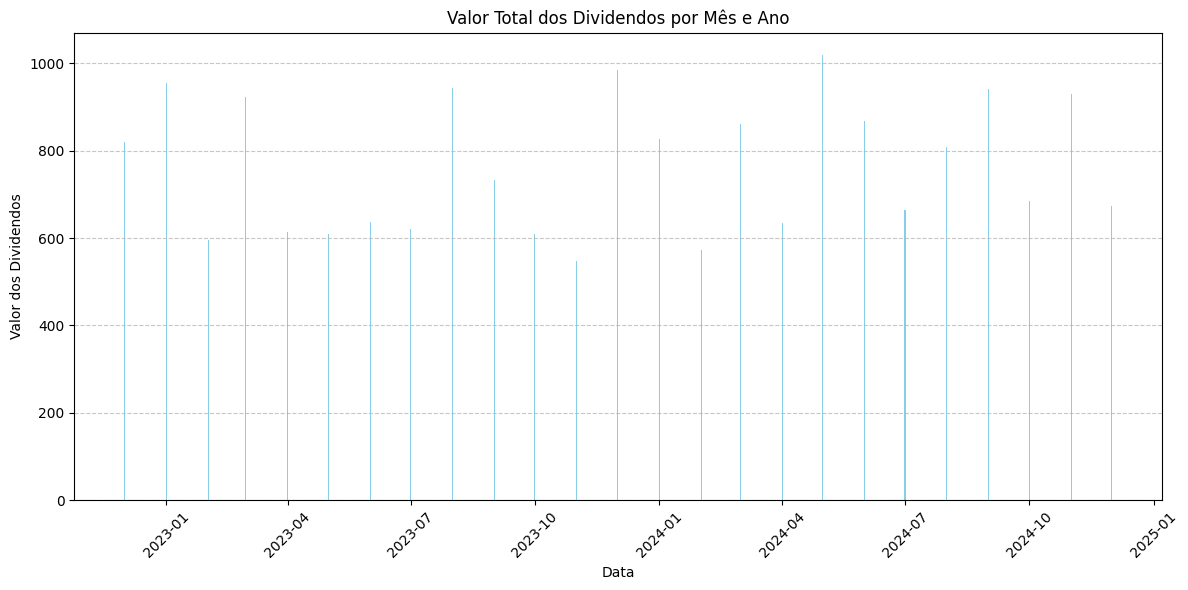

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Lê o arquivo CSV
arquivo_csv = '/content/Dividendos.csv'
df = pd.read_csv(arquivo_csv, delimiter=';')

# Agrupar os dados por Mês e Ano e somar os valores dos dividendos
resultado = df.groupby(['Ano', 'Mes'])['Valor'].sum().reset_index()

# Criar uma coluna de data para facilitar a plotagem
resultado['Data'] = pd.to_datetime(resultado['Ano'].astype(str) + resultado['Mes'].astype(str).str.zfill(2) + '01', format='%Y%m%d')

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(resultado['Data'], resultado['Valor'], color='skyblue')
plt.xlabel('Data')
plt.ylabel('Valor dos Dividendos')
plt.title('Valor Total dos Dividendos por Mês e Ano')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()


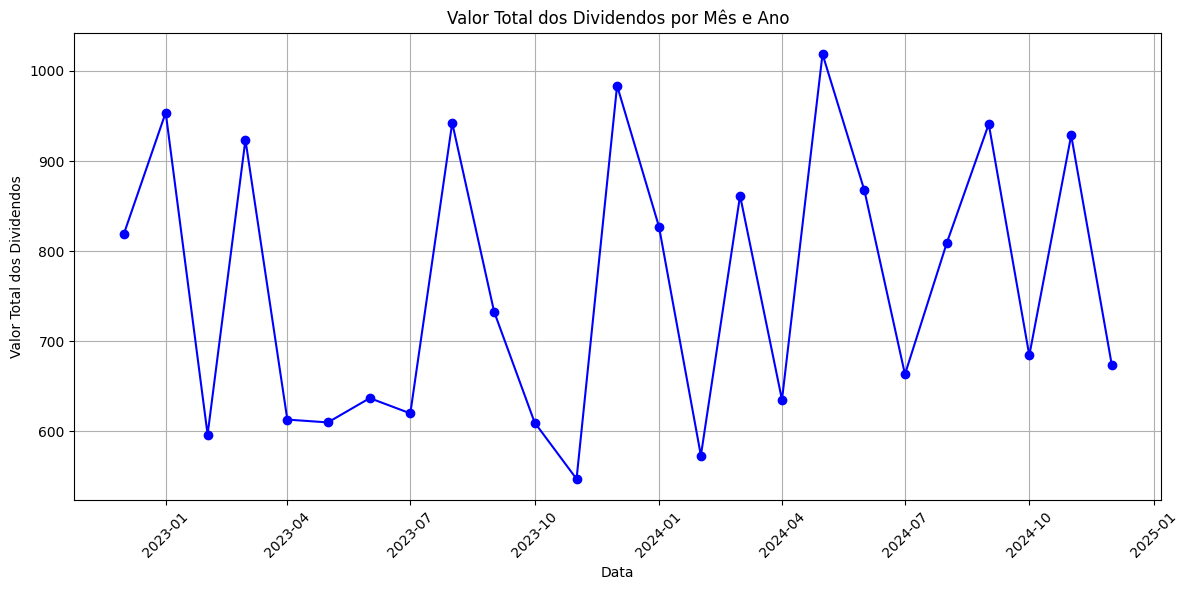

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Lê o arquivo CSV
arquivo_csv = '/content/Dividendos.csv'
df = pd.read_csv(arquivo_csv, delimiter=';')

# Agrupar os dados por Mês e Ano e somar os valores dos dividendos
resultado = df.groupby(['Ano', 'Mes'])['Valor'].sum().reset_index()

# Criar uma coluna de data para o eixo x
resultado['Data'] = pd.to_datetime(resultado['Ano'].astype(str) + resultado['Mes'].astype(str).str.zfill(2) + '01', format='%Y%m%d')

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(resultado['Data'], resultado['Valor'], marker='o', linestyle='-', color='b')

# Adicionar títulos e rótulos
plt.title('Valor Total dos Dividendos por Mês e Ano')
plt.xlabel('Data')
plt.ylabel('Valor Total dos Dividendos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd

# Caminhos para os arquivos CSV
arquivo_calculo_dividendos = '/content/calculo_dividendos.csv'
arquivo_calculo_fii = '/content/calculo_fii.csv'

# Ler os arquivos CSV com delimitador por vírgula
df_dividendos = pd.read_csv(arquivo_calculo_dividendos, delimiter=',')
df_fii = pd.read_csv(arquivo_calculo_fii, delimiter=',')

# Exibir as colunas dos DataFrames para verificação
print("Colunas do arquivo Calculo Dividendos:")
print(df_dividendos.columns)

print("Colunas do arquivo Calculo FII:")
print(df_fii.columns)

# Verificar e corrigir nomes de colunas se necessário
df_dividendos.columns = df_dividendos.columns.str.strip()
df_fii.columns = df_fii.columns.str.strip()

# Fazer o merge dos DataFrames com base na coluna 'Ticker'
df_merged = pd.merge(df_fii, df_dividendos, on='Ticker', how='left')

# Reorganizar as colunas conforme especificado
colunas_ordenadas = [
    'Ticker', 'Quantidade', 'Preço Atual', 'Preço Médio', 'Comparação (%)',
    'Comparação (Valor)', 'Preço Atual Total', 'Preço Médio Total',
    'Total Dividendos', 'Dividendos dos Ultimos 12 Meses', 'Ultimo Dividendo'
]

# Verificar se todas as colunas esperadas estão presentes
colunas_faltando = [col for col in colunas_ordenadas if col not in df_merged.columns]
if colunas_faltando:
    raise ValueError(f"As seguintes colunas estão faltando no DataFrame resultante: {', '.join(colunas_faltando)}")

# Reorganizar as colunas no DataFrame
df_merged = df_merged[colunas_ordenadas]

# Exibir o DataFrame resultante
print(df_merged)

# Salvar o DataFrame resultante em um arquivo CSV
df_merged.to_csv('/content/merged_data.csv', index=False)



Colunas do arquivo Calculo Dividendos:
Index(['Ticker', 'Total Dividendos', 'Dividendos dos Ultimos 12 Meses',
       'Ultimo Dividendo'],
      dtype='object')
Colunas do arquivo Calculo FII:
Index(['Ticker', 'Quantidade', 'Preço Atual', 'Preço Médio', 'Comparação (%)',
       'Comparação (Valor)', 'Dif perc Atual Medio', 'Preço Atual Total',
       'Preço Médio Total'],
      dtype='object')
    Ticker  Quantidade  Preço Atual  Preço Médio  Comparação (%)  \
0   XPML11          54       112.27       103.75          108.21   
1   MXRF11        1250        10.00        10.07           99.30   
2   BCFF11        1041         8.27         8.68           95.28   
3   BTLG11          43       101.81       102.69           99.14   
4   CPTS11         755         8.17         9.10           89.78   
5   HGCR11          10       102.29       106.00           96.50   
6   IRDM11         137        69.98        85.26           82.08   
7   SNAG11         340        10.22        10.07          1

In [ ]:
import pandas as pd

# Caminho para o arquivo CSV
arquivo_merged_data = '/content/merged_data.csv'

# Ler o arquivo CSV
df = pd.read_csv(arquivo_merged_data, delimiter=',')

# Verificar se todas as colunas necessárias estão presentes
colunas_necessarias = ['Ticker', 'Preço Atual Total', 'Ultimo Dividendo', 'Dividendos dos Ultimos 12 Meses']
for col in colunas_necessarias:
    if col not in df.columns:
        raise ValueError(f"A coluna '{col}' está faltando no DataFrame.")

# Adicionar a coluna 'DY Mensal'
df['DY Mensal'] = (df['Ultimo Dividendo'] / df['Preço Atual Total']) * 100

# Adicionar a coluna 'DY Anual'
df['DY Anual'] = (df['Dividendos dos Ultimos 12 Meses'] / df['Preço Atual Total']) * 100

# Formatar as colunas como porcentagem
df['DY Mensal'] = df['DY Mensal'].apply(lambda x: f"{x:.2f}%")
df['DY Anual'] = df['DY Anual'].apply(lambda x: f"{x:.2f}%")

# Reorganizar a ordem das colunas para incluir as novas colunas
colunas_ordenadas = [
    'Ticker', 'Quantidade', 'Preço Atual', 'Preço Médio', 'Comparação (%)',
    'Comparação (Valor)', 'Preço Atual Total', 'Preço Médio Total',
    'Total Dividendos', 'Dividendos dos Ultimos 12 Meses', 'Ultimo Dividendo',
    'DY Mensal', 'DY Anual'
]

# Reorganizar as colunas no DataFrame
df = df[colunas_ordenadas]

# Exibir o DataFrame atualizado
print(df)

# Salvar o DataFrame atualizado em um novo arquivo CSV
df.to_csv('/content/merged_data_with_dy.csv', index=False, sep=',')


    Ticker  Quantidade  Preço Atual  Preço Médio  Comparação (%)  \
0   XPML11          54       112.27       103.75          108.21   
1   MXRF11        1250        10.00        10.07           99.30   
2   BCFF11        1041         8.27         8.68           95.28   
3   BTLG11          43       101.81       102.69           99.14   
4   CPTS11         755         8.17         9.10           89.78   
5   HGCR11          10       102.29       106.00           96.50   
6   IRDM11         137        69.98        85.26           82.08   
7   SNAG11         340        10.22        10.07          101.49   
8   KFOF11          30        83.95        90.00           93.28   
9   KISU11         305         8.04         7.86          102.29   
10  RURA11          10         9.87         9.82          100.51   
11  TVRI11          31       100.30       103.70           96.72   
12  SNCI11          26        93.75        99.47           94.25   
13  VILG11          35        87.33        90.37

In [ ]:
import pandas as pd

# Carregar o dataset
file_path = '/content/merged_data_with_dy.csv'
df = pd.read_csv(file_path)

# Remover o símbolo '%' das colunas 'DY Anual' e 'DY Mensal' e converter para decimal
df['DY Anual'] = df['DY Anual'].str.rstrip('%').astype('float') / 100.0
df['DY Mensal'] = df['DY Mensal'].str.rstrip('%').astype('float') / 100.0

# Calcular a proporção de cada ativo no montante total da carteira
df['Proporção'] = df['Preço Médio Total'] / df['Preço Médio Total'].sum()

# Calcular o Dividend Yield Anual e Mensal ponderado pela proporção
df['DY Anual Ponderado'] = df['DY Anual'] * df['Proporção']
df['DY Mensal Ponderado'] = df['DY Mensal'] * df['Proporção']

# Calcular o Dividend Yield total da carteira (anual e mensal)
dy_anual_carteira = df['DY Anual Ponderado'].sum()
dy_mensal_carteira = df['DY Mensal Ponderado'].sum()

# Mostrar os resultados
print(f"Dividend Yield Anual total da carteira: {dy_anual_carteira:.2%}")
print(f"Dividend Yield Mensal total da carteira: {dy_mensal_carteira:.2%}")


Dividend Yield Anual total da carteira: 8.02%
Dividend Yield Mensal total da carteira: 1.02%


In [ ]:
import pandas as pd

# Dados dos fundos imobiliários
dados = {
    'Ticker': ['MXRF11', 'IRDM11', 'XPCA11', 'KFOF11'],
    'Preço Atual': [10.08, 71.56, 8.90, 87.63],
    'Último Rendimento': [0.10, 0.74, 0.11, 0.75],
    'Patrimônio Líquido': [4300000000, 3100000000, 431600000,658300000],  # Bilhões convertidos para número inteiro
    'Valor Patrimonial': [9.75, 85.18, 9.48, 93.84],
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Calcular P/VP (Preço / Valor Patrimonial)
df['P/VP'] = df['Preço Atual'] / df['Valor Patrimonial']
df['DY Mensal'] = df['Último Rendimento'] / df['Preço Atual'] * 100

# Mostrar o DataFrame
print(df)

# Salvar em um arquivo CSV
df.to_csv('dados_fii.csv', index=False)



   Ticker  Preço Atual  Último Rendimento  Patrimônio Líquido  \
0  MXRF11        10.08               0.10          4300000000   
1  IRDM11        71.56               0.74          3100000000   
2  XPCA11         8.90               0.11           431600000   
3  KFOF11        87.63               0.75           658300000   

   Valor Patrimonial      P/VP  DY Mensal  
0               9.75  1.033846   0.992063  
1              85.18  0.840103   1.034097  
2               9.48  0.938819   1.235955  
3              93.84  0.933824   0.855871  


In [ ]:
import pandas as pd
from scipy.optimize import linprog

# Dados dos ativos
dados = {
    'Ticker': ['MXRF11', 'IRDM11', 'XPCA11', 'KFOF11'],
    'Preço Atual': [10.08, 71.56, 8.90, 87.63],
    'DY Mensal': [0.992063, 1.034097, 1.235955, 0.855871],  # Dividend Yield Mensal (%)
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Função objetivo (maximizar os dividendos)
# Precisamos multiplicar por -1 porque o linprog minimiza a função, mas queremos maximizar
c = -df['DY Mensal'].values

# Restrições (somente uma: não ultrapassar R$1000 investidos)
A = [df['Preço Atual'].values]
b = [1000]

# Limites (quantidade de cada ativo pode variar entre 0 e 1000/Preço Atual)
x_bounds = [(0, 1000 / price) for price in df['Preço Atual'].values]

# Resolução do problema de otimização
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Resultado
if res.success:
    print("Investimento ótimo para maximizar os dividendos:")
    for i, qty in enumerate(res.x):
        print(f"{df['Ticker'][i]}: Comprar {qty:.2f} unidades, Investimento = R${qty * df['Preço Atual'][i]:.2f}")
else:
    print("Não foi possível encontrar uma solução ótima.")


Investimento ótimo para maximizar os dividendos:
MXRF11: Comprar 0.00 unidades, Investimento = R$0.00
IRDM11: Comprar 0.00 unidades, Investimento = R$0.00
XPCA11: Comprar 112.36 unidades, Investimento = R$1000.00
KFOF11: Comprar 0.00 unidades, Investimento = R$0.00


In [ ]:
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers

# Dados dos ativos
dados = {
    'Ticker': ['MXRF11', 'IRDM11', 'XPCA11', 'KFOF11'],
    'Preço Atual': [10.08, 71.56, 8.90, 87.63],
    'Último Rendimento': [0.10, 0.74, 0.11, 0.75],  # Dividendos mais recentes
    'DY Mensal': [0.992063, 1.034097, 1.235955, 0.855871]  # Dividend Yield Mensal
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Retorno esperado (DY Mensal)
retornos = np.array(df['DY Mensal'])

# Matriz de covariância simplificada para o exemplo
# Em um cenário real, isso seria baseado em dados históricos de retornos.
cov_matrix = np.array([
    [0.0001, 0.00002, 0.00003, 0.00002],
    [0.00002, 0.0002, 0.00003, 0.00002],
    [0.00003, 0.00003, 0.0003, 0.00002],
    [0.00002, 0.00002, 0.00002, 0.0004]
])

# Parâmetros do problema de otimização
n = len(retornos)
P = matrix(cov_matrix)
q = matrix(np.zeros(n))
G = matrix(-np.eye(n))  # Restrições para pesos não-negativos
h = matrix(np.zeros(n))
A = matrix(np.ones((1, n)))
b = matrix(1.0)

# Resolver o problema de otimização
sol = solvers.qp(P, q, G, h, A, b)

# Pesos ótimos
pesos = np.array(sol['x']).flatten()

# Investimento total
investimento_total = 1000

# Distribuição do investimento
quantidades = pesos * investimento_total / df['Preço Atual'].values

# Cálculo dos dividendos
dividendos_totais = np.sum(quantidades * df['Último Rendimento'].values)

# Exibir resultados
for i, ticker in enumerate(df['Ticker']):
    print(f"{ticker}: Comprar {quantidades[i]:.2f} unidades, Investimento = R${quantidades[i] * df['Preço Atual'][i]:.2f}")

print(f"\nPeso dos ativos na carteira: {pesos}")
print(f"Dividendos totais esperados: R${dividendos_totais:.2f}")



     pcost       dcost       gap    pres   dres
 0:  3.9997e-05 -1.0000e+00  1e+00  0e+00  3e+00
 1:  3.9995e-05 -9.9975e-03  1e-02  2e-16  3e-02
 2:  3.9849e-05 -9.7206e-05  1e-04  8e-17  3e-04
 3:  3.4748e-05  1.4347e-05  2e-05  6e-17  4e-05
 4:  3.1713e-05  2.9414e-05  2e-06  8e-17  1e-20
 5:  3.1644e-05  3.1596e-05  5e-08  6e-17  9e-21
Optimal solution found.
MXRF11: Comprar 52.05 unidades, Investimento = R$524.62
IRDM11: Comprar 3.26 unidades, Investimento = R$233.19
XPCA11: Comprar 14.37 unidades, Investimento = R$127.87
KFOF11: Comprar 1.30 unidades, Investimento = R$114.32

Peso dos ativos na carteira: [0.52462139 0.23318603 0.1278712  0.11432138]
Dividendos totais esperados: R$10.17


PAra ficar de olho
FII : KNCA11 (fiagro), RURA11 (Fiagro)
ações: PETR4
FI-Infra: Juro11
---




In [ ]:
# Definir o valor total
valor_total = 122000

# Definir as porcentagens
percentual_fundos_imobiliarios = 0.57
percentual_acoes = 0.30
percentual_renda_fixa = 0.10
percentual_caixa = 0.03

# Calcular os valores proporcionais
valor_fundos_imobiliarios = valor_total * percentual_fundos_imobiliarios
valor_acoes = valor_total * percentual_acoes
valor_renda_fixa = valor_total * percentual_renda_fixa
valor_caixa = valor_total * percentual_caixa

# Exibir os resultados
print(f"Fundos Imobiliários: R${valor_fundos_imobiliarios:.2f}")
print(f"Ações: R${valor_acoes:.2f}")
print(f"Renda Fixa: R${valor_renda_fixa:.2f}")
print(f"Caixa: R${valor_caixa:.2f}")


Fundos Imobiliários: R$69540.00
Ações: R$36600.00
Renda Fixa: R$12200.00
Caixa: R$3660.00
